KNN 분류 정확도: 1.0000


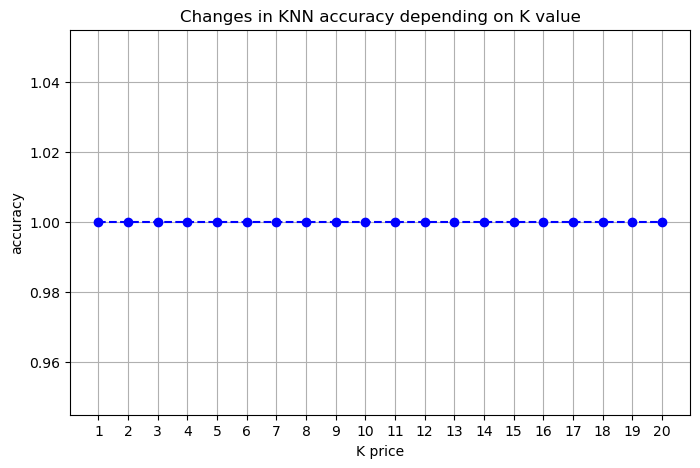

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 붓꽃 데이터 로드
data = load_iris()
X, y = data.data, data.target

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 정규화가 성능에 도움됨)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 생성 및 학습
k = 5  # 최근접 이웃 개수 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN 분류 정확도: {accuracy:.4f}')


# 시각화: K값에 따른 정확도 변화
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('K price')
plt.ylabel('accuracy')
plt.title('Changes in KNN accuracy depending on K value')
plt.xticks(np.arange(1, 21, step=1))
plt.grid()
plt.show()

In [ ]:
### t수정필요

KNN Classification Accuracy: 0.6948


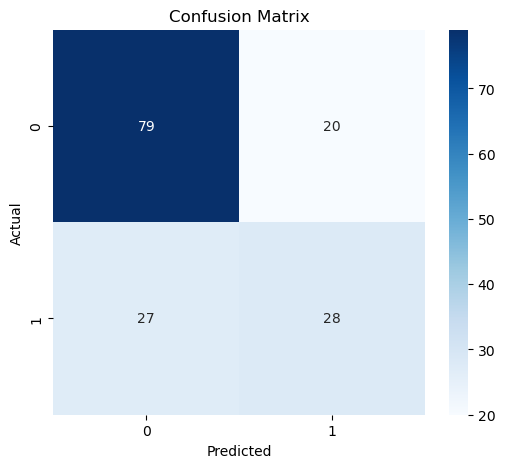

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



# 질병 예측 데이터 로드
data = pd.read_csv('C:/Users/dudnj/Gachon/4-2/AI/Week_02/database/diabetes.csv')  # 실제 데이터 파일 경로로 변경

# 특징(X)과 타겟(y) 분리 (마지막 열이 라벨이라고 가정)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 정규화가 성능에 도움됨)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 생성 및 학습
k = 5  # 최근접 이웃 개수 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classification Accuracy: {accuracy:.4f}')

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
import pandas as pd

# 타이타닉 데이터 CSV 파일 읽기
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_02/database/titanic.csv'  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# 각 열에서 null 값의 개수 출력
null_counts = df.isnull().sum()

# 결과 출력
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [46]:
# 생존자(1)와 사망자(0) 카운트
survival_counts = df['Survived'].value_counts()

# 결과 출력
print(f"Survived (1): {survival_counts[1]}")
print(f"Not Survived (0): {survival_counts[0]}")

Survived (1): 342
Not Survived (0): 549


In [58]:
# 이름과 티켓 이름은 생존에 영향이 없으므로 드랍
# 'name' 칼럼 드롭
df = df.drop(columns=['Name'])
df = df.drop(columns=['Ticket'])
# 결과 확인
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [ ]:
# 나이에 결측치가 177개 있다.
# 나이의 결측치 행이 많고 나이는 중요 정보이므로 드랍할 수 없다.
# 평균 값을 넣는다

In [62]:
mean_age = df['Age'].mean()

# 'age' 칼럼의 결측치를 평균 값으로 채우기
df['Age'] = df['Age'].fillna(mean_age)


# 각 열에서 null 값의 개수 출력
null_counts = df.isnull().sum()

# 결과 출력
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Cabin 칼럼은 일반적으로 선실 번호를 나타냅니다. 이 칼럼에는 많은 결측치가 있을 수 있는데,
# 그 이유는 많은 승객이 선실 번호를 제공하지 않거나 알 수 없기 때문입니다.
# Cabin 칼럼의 결측치를 채우는 방법으로는 두 가지가 있습니다.

# - 결측치를 None이나 Unknown으로 채우기: 선실 정보가 없다는 것을 명시적으로 나타내는 방법입니다.
# - 가장 빈번한 값으로 채우기: 선실이 특정 구역에 몰려있을 수 있기 때문에 가장 빈번하게 나타나는 선실 번호로 채울 수 있습니다.

#해당 문서에서는 Unknown으로 채웁니다.

In [64]:
# 'Cabin' 칼럼의 결측치를 'Unknown'으로 채우기
df['Cabin'] = df['Cabin'].fillna('Unknown')

# 각 열에서 null 값의 개수 출력
null_counts = df.isnull().sum()

# 결과 출력
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [ ]:
#Embarked 칼럼
#Embarked 칼럼은 승객이 탑승한 항구를 나타내며, 결측치는 비교적 적은 경우에만 존재할 수 있습니다.
#Embarked의 결측치를 채울 때는, 다른 변수들과의 관계를 고려하여 가장 자주 나타나는 값으로 채우는 것이 일반적입니다.

# Embarked 칼럼에서 결측치를 채우는 방법:

#가장 빈번한 값으로 채우기: 예를 들어, 'S' (Southampton)가 가장 흔한 탑승 항구일 수 있습니다.


In [66]:
# 'Embarked' 칼럼의 결측치를 가장 빈번한 값으로 채우기
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

# 각 열에서 null 값의 개수 출력
null_counts = df.isnull().sum()

# 결과 출력
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64
